In [ ]:
#importing libraries
import warnings
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
warnings.simplefilter(action="ignore", category=FutureWarning)

In [ ]:
#reading csv
df=pd.read_csv("/content/drive/MyDrive/AI Free classes/mexico-real-estate.csv")

In [ ]:
df

,created_on,operation,property_type,place_name,place_with_parent_names,geonames_id,lat-lon,price,currency,price_aprox_local_currency,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,2013-09-19,rent,house,Playa del Carmen,|México|Quintana Roo|Solidaridad|Playa del Car...,NaN,"20.612709,-87.102987",NaN,NaN,NaN,...,250.0,NaN,NaN,NaN,NaN,NaN,http://playa-del-carmen-playa-del-carmen.prope...,Referencia #55546. Hermosa casa en el barrio C...,Casa en Alquiler. Ref. #55546. 3 Dormitorios. ...,https://thumbs-cf.properati.com/1/dLISoi0WStzf...
1,2013-09-19,rent,apartment,Nuevo Centro Urbano,|México|Quintana Roo|Solidaridad|Playa del Car...,NaN,"20.626679,-87.075944",2200.0,USD,41378.70,...,110.0,20.000000,20.000000,NaN,NaN,NaN,http://nuevo-centro-urbano.properati.com.mx/o4...,Referencia #27985. Ático completamente amuebla...,Departamento en Alquiler. Ref. #27985. 2 Dormi...,https://thumbs-cf.properati.com/9/-DZ0FUVqgAnA...
2,2013-09-19,rent,apartment,Nuevo Centro Urbano,|México|Quintana Roo|Solidaridad|Playa del Car...,NaN,"20.626729,-87.075858",19000.0,ARS,23546.17,...,110.0,11.380818,172.727273,NaN,NaN,NaN,http://nuevo-centro-urbano.properati.com.mx/o5...,Referencia #27996. Departamento completamente ...,Departamento en Alquiler. Ref. #27996. 2 Dormi...,https://thumbs-cf.properati.com/4/dyZjLPbRTuui...
3,2013-09-19,rent,apartment,Nuevo Centro Urbano,|México|Quintana Roo|Solidaridad|Playa del Car...,NaN,"20.630104,-87.072484",10000.0,ARS,12392.73,...,65.0,10.136769,153.846154,NaN,NaN,NaN,http://nuevo-centro-urbano.properati.com.mx/ob...,Referencia #29065. Departamento perfecto para ...,Departamento en Alquiler. Ref. #29065. 1 Dormi...,https://thumbs-cf.properati.com/0/2tp0o2qIaZia...
4,2013-09-19,rent,store,Playa del Carmen,|México|Quintana Roo|Solidaridad|Playa del Car...,NaN,"20.635424,-87.077995",30000.0,ARS,37178.19,...,250.0,7.906680,120.000000,NaN,NaN,NaN,http://playa-del-carmen-playa-del-carmen.prope...,Referencia #29386. Ubicado en uno de los princ...,Local en Alquiler. Ref. #29386. 250 m2. Local ...,https://thumbs-cf.properati.com/2/5L2Y9_OYAxNL...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37592,2016-10-31,rent,store,Guadalajara,|México|Jalisco|Guadalajara|,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,http://guadalajara-jalisco.properati.com.mx/re...,Se traspasa local comercial en Plaza Punto Rub...,Local comercial en renta en Lomas de Providenc...,https://thumbs-cf.properati.com/8/ohfd_7uoQSNy...
37593,2016-10-31,rent,apartment,San Pedro Garza García,|México|Nuevo León|San Pedro Garza García|,NaN,"25.628453,-100.365488",14500.0,MXN,14368.75,...,100.0,NaN,145.000000,NaN,NaN,NaN,http://san-pedro-garza-garcia.properati.com.mx...,Nocnok ID: MX16-BW5320. departamento en el pis...,Departamento en Renta en Valle de San Angel,https://thumbs-cf.properati.com/0/TIH9HHSOQoju...
37594,2016-10-31,rent,apartment,Benito Juárez,|México|Distrito Federal|Benito Juárez|,NaN,NaN,15000.0,MXN,14864.16,...,78.0,7.747941,192.307692,NaN,NaN,NaN,http://benito-juarez.properati.com.mx/re4r_ren...,"<p>Del Valle Norte. Departamento de 78 m2, ext...","Departamento 78 m2, exterior, en 3er piso, co...",NaN
37595,2016-10-31,rent,apartment,Benito Juárez,|México|Distrito Federal|Benito Juárez|,NaN,"19.394358,-99.177444",18000.0,MXN,17837.04,...,97.0,NaN,185.567010,NaN,NaN,NaN,http://benito-juarez.properati.com.mx/re50_ren...,"<p>HERMOSO DEPARTAMENTO 3 RECAMARAS, 2 ESTACIO...",IMPECABLE DEPARTAMENTO COL. NAPOLES DISTRITO F...,https://thumbs-cf.properati.com/5/9sKH0jroF8wA...


In [ ]:
df.head()

,created_on,operation,property_type,place_name,place_with_parent_names,geonames_id,lat-lon,price,currency,price_aprox_local_currency,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,2013-09-19,rent,house,Playa del Carmen,|México|Quintana Roo|Solidaridad|Playa del Car...,NaN,"20.612709,-87.102987",NaN,NaN,NaN,...,250.0,NaN,NaN,NaN,NaN,NaN,http://playa-del-carmen-playa-del-carmen.prope...,Referencia #55546. Hermosa casa en el barrio C...,Casa en Alquiler. Ref. #55546. 3 Dormitorios. ...,https://thumbs-cf.properati.com/1/dLISoi0WStzf...
1,2013-09-19,rent,apartment,Nuevo Centro Urbano,|México|Quintana Roo|Solidaridad|Playa del Car...,NaN,"20.626679,-87.075944",2200.0,USD,41378.70,...,110.0,20.000000,20.000000,NaN,NaN,NaN,http://nuevo-centro-urbano.properati.com.mx/o4...,Referencia #27985. Ático completamente amuebla...,Departamento en Alquiler. Ref. #27985. 2 Dormi...,https://thumbs-cf.properati.com/9/-DZ0FUVqgAnA...
2,2013-09-19,rent,apartment,Nuevo Centro Urbano,|México|Quintana Roo|Solidaridad|Playa del Car...,NaN,"20.626729,-87.075858",19000.0,ARS,23546.17,...,110.0,11.380818,172.727273,NaN,NaN,NaN,http://nuevo-centro-urbano.properati.com.mx/o5...,Referencia #27996. Departamento completamente ...,Departamento en Alquiler. Ref. #27996. 2 Dormi...,https://thumbs-cf.properati.com/4/dyZjLPbRTuui...
3,2013-09-19,rent,apartment,Nuevo Centro Urbano,|México|Quintana Roo|Solidaridad|Playa del Car...,NaN,"20.630104,-87.072484",10000.0,ARS,12392.73,...,65.0,10.136769,153.846154,NaN,NaN,NaN,http://nuevo-centro-urbano.properati.com.mx/ob...,Referencia #29065. Departamento perfecto para ...,Departamento en Alquiler. Ref. #29065. 1 Dormi...,https://thumbs-cf.properati.com/0/2tp0o2qIaZia...
4,2013-09-19,rent,store,Playa del Carmen,|México|Quintana Roo|Solidaridad|Playa del Car...,NaN,"20.635424,-87.077995",30000.0,ARS,37178.19,...,250.0,7.906680,120.000000,NaN,NaN,NaN,http://playa-del-carmen-playa-del-carmen.prope...,Referencia #29386. Ubicado en uno de los princ...,Local en Alquiler. Ref. #29386. 250 m2. Local ...,https://thumbs-cf.properati.com/2/5L2Y9_OYAxNL...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37597 entries, 0 to 37596
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   created_on                  37597 non-null  object 
 1   operation                   37597 non-null  object 
 2   property_type               37597 non-null  object 
 3   place_name                  37597 non-null  object 
 4   place_with_parent_names     37597 non-null  object 
 5   geonames_id                 0 non-null      float64
 6   lat-lon                     31835 non-null  object 
 7   price                       36525 non-null  float64
 8   currency                    36525 non-null  object 
 9   price_aprox_local_currency  36525 non-null  float64
 10  price_aprox_usd             36525 non-null  float64
 11  surface_total_in_m2         23151 non-null  float64
 12  surface_covered_in_m2       36084 non-null  float64
 13  price_usd_per_m2            148

In [ ]:
df.shape

(37597, 22)

In [ ]:
df.describe()

,geonames_id,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,0.0,3.652500e+04,3.652500e+04,36525.000000,23151.000000,36084.000000,14828.000000,30071.000000,4174.000000,1245.000000,57.000000
mean,NaN,2.045150e+04,2.401479e+04,1276.805686,364.516133,265.611712,6.475197,241.127655,3.425731,2.640964,1199.350877
std,NaN,4.490340e+04,5.446808e+04,2895.929004,2443.918011,6108.449844,18.691082,1929.047048,28.681249,1.073845,1527.892614
min,NaN,5.000000e+01,9.404200e+02,50.000000,-200.000000,0.000000,-606.035000,0.008000,1.000000,1.000000,1.000000
25%,NaN,7.000000e+03,7.927590e+03,421.490000,0.000000,59.000000,2.634937,57.500000,2.000000,2.000000,240.000000
50%,NaN,1.300000e+04,1.387653e+04,737.780000,100.000000,120.000000,4.566067,88.235294,2.000000,3.000000,800.000000
75%,NaN,2.250000e+04,2.477380e+04,1317.160000,240.000000,230.000000,7.641350,145.833333,2.000000,3.000000,1650.000000
max,NaN,1.850000e+06,1.833264e+06,97469.990000,185130.000000,1000000.000000,1867.207895,150000.000000,1136.000000,14.000000,9000.000000


In [ ]:
df.head()

,created_on,operation,property_type,place_name,place_with_parent_names,geonames_id,lat-lon,price,currency,price_aprox_local_currency,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,2013-09-19,rent,house,Playa del Carmen,|México|Quintana Roo|Solidaridad|Playa del Car...,NaN,"20.612709,-87.102987",NaN,NaN,NaN,...,250.0,NaN,NaN,NaN,NaN,NaN,http://playa-del-carmen-playa-del-carmen.prope...,Referencia #55546. Hermosa casa en el barrio C...,Casa en Alquiler. Ref. #55546. 3 Dormitorios. ...,https://thumbs-cf.properati.com/1/dLISoi0WStzf...
1,2013-09-19,rent,apartment,Nuevo Centro Urbano,|México|Quintana Roo|Solidaridad|Playa del Car...,NaN,"20.626679,-87.075944",2200.0,USD,41378.70,...,110.0,20.000000,20.000000,NaN,NaN,NaN,http://nuevo-centro-urbano.properati.com.mx/o4...,Referencia #27985. Ático completamente amuebla...,Departamento en Alquiler. Ref. #27985. 2 Dormi...,https://thumbs-cf.properati.com/9/-DZ0FUVqgAnA...
2,2013-09-19,rent,apartment,Nuevo Centro Urbano,|México|Quintana Roo|Solidaridad|Playa del Car...,NaN,"20.626729,-87.075858",19000.0,ARS,23546.17,...,110.0,11.380818,172.727273,NaN,NaN,NaN,http://nuevo-centro-urbano.properati.com.mx/o5...,Referencia #27996. Departamento completamente ...,Departamento en Alquiler. Ref. #27996. 2 Dormi...,https://thumbs-cf.properati.com/4/dyZjLPbRTuui...
3,2013-09-19,rent,apartment,Nuevo Centro Urbano,|México|Quintana Roo|Solidaridad|Playa del Car...,NaN,"20.630104,-87.072484",10000.0,ARS,12392.73,...,65.0,10.136769,153.846154,NaN,NaN,NaN,http://nuevo-centro-urbano.properati.com.mx/ob...,Referencia #29065. Departamento perfecto para ...,Departamento en Alquiler. Ref. #29065. 1 Dormi...,https://thumbs-cf.properati.com/0/2tp0o2qIaZia...
4,2013-09-19,rent,store,Playa del Carmen,|México|Quintana Roo|Solidaridad|Playa del Car...,NaN,"20.635424,-87.077995",30000.0,ARS,37178.19,...,250.0,7.906680,120.000000,NaN,NaN,NaN,http://playa-del-carmen-playa-del-carmen.prope...,Referencia #29386. Ubicado en uno de los princ...,Local en Alquiler. Ref. #29386. 250 m2. Local ...,https://thumbs-cf.properati.com/2/5L2Y9_OYAxNL...


In [ ]:
df.tail()

,created_on,operation,property_type,place_name,place_with_parent_names,geonames_id,lat-lon,price,currency,price_aprox_local_currency,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
37592,2016-10-31,rent,store,Guadalajara,|México|Jalisco|Guadalajara|,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,http://guadalajara-jalisco.properati.com.mx/re...,Se traspasa local comercial en Plaza Punto Rub...,Local comercial en renta en Lomas de Providenc...,https://thumbs-cf.properati.com/8/ohfd_7uoQSNy...
37593,2016-10-31,rent,apartment,San Pedro Garza García,|México|Nuevo León|San Pedro Garza García|,NaN,"25.628453,-100.365488",14500.0,MXN,14368.75,...,100.0,NaN,145.000000,NaN,NaN,NaN,http://san-pedro-garza-garcia.properati.com.mx...,Nocnok ID: MX16-BW5320. departamento en el pis...,Departamento en Renta en Valle de San Angel,https://thumbs-cf.properati.com/0/TIH9HHSOQoju...
37594,2016-10-31,rent,apartment,Benito Juárez,|México|Distrito Federal|Benito Juárez|,NaN,NaN,15000.0,MXN,14864.16,...,78.0,7.747941,192.307692,NaN,NaN,NaN,http://benito-juarez.properati.com.mx/re4r_ren...,"<p>Del Valle Norte. Departamento de 78 m2, ext...","Departamento 78 m2, exterior, en 3er piso, co...",NaN
37595,2016-10-31,rent,apartment,Benito Juárez,|México|Distrito Federal|Benito Juárez|,NaN,"19.394358,-99.177444",18000.0,MXN,17837.04,...,97.0,NaN,185.567010,NaN,NaN,NaN,http://benito-juarez.properati.com.mx/re50_ren...,"<p>HERMOSO DEPARTAMENTO 3 RECAMARAS, 2 ESTACIO...",IMPECABLE DEPARTAMENTO COL. NAPOLES DISTRITO F...,https://thumbs-cf.properati.com/5/9sKH0jroF8wA...
37596,2016-10-31,rent,apartment,Monterrey,|México|Nuevo León|Monterrey|,NaN,"25.6318402,-100.2801781",18000.0,MXN,17837.04,...,0.0,NaN,NaN,NaN,NaN,NaN,http://monterrey-nuevo-leon.properati.com.mx/r...,<p> Excelente departamento en renta sobre aven...,DEPARTAMENTO EN RENTA EN MICROPOLIS MONTERREY,https://thumbs-cf.properati.com/4/LqbLb1KmjuXb...


In [ ]:
len(df)

37597

In [ ]:
#only want to see houses in property type
df['property_type']=='apartment'

0        False
1         True
2         True
3         True
4        False
         ...  
37592    False
37593     True
37594     True
37595     True
37596     True
Name: property_type, Length: 37597, dtype: bool

In [ ]:
#see the entire dataset where the property type is apartments
df[df['property_type']=='apartment']

,created_on,operation,property_type,place_name,place_with_parent_names,geonames_id,lat-lon,price,currency,price_aprox_local_currency,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
1,2013-09-19,rent,apartment,Nuevo Centro Urbano,|México|Quintana Roo|Solidaridad|Playa del Car...,NaN,"20.626679,-87.075944",2200.0,USD,41378.70,...,110.0,20.000000,20.000000,NaN,NaN,NaN,http://nuevo-centro-urbano.properati.com.mx/o4...,Referencia #27985. Ático completamente amuebla...,Departamento en Alquiler. Ref. #27985. 2 Dormi...,https://thumbs-cf.properati.com/9/-DZ0FUVqgAnA...
2,2013-09-19,rent,apartment,Nuevo Centro Urbano,|México|Quintana Roo|Solidaridad|Playa del Car...,NaN,"20.626729,-87.075858",19000.0,ARS,23546.17,...,110.0,11.380818,172.727273,NaN,NaN,NaN,http://nuevo-centro-urbano.properati.com.mx/o5...,Referencia #27996. Departamento completamente ...,Departamento en Alquiler. Ref. #27996. 2 Dormi...,https://thumbs-cf.properati.com/4/dyZjLPbRTuui...
3,2013-09-19,rent,apartment,Nuevo Centro Urbano,|México|Quintana Roo|Solidaridad|Playa del Car...,NaN,"20.630104,-87.072484",10000.0,ARS,12392.73,...,65.0,10.136769,153.846154,NaN,NaN,NaN,http://nuevo-centro-urbano.properati.com.mx/ob...,Referencia #29065. Departamento perfecto para ...,Departamento en Alquiler. Ref. #29065. 1 Dormi...,https://thumbs-cf.properati.com/0/2tp0o2qIaZia...
5,2013-09-19,rent,apartment,Playa del Carmen,|México|Quintana Roo|Solidaridad|Playa del Car...,NaN,"20.630296,-87.072695",12000.0,ARS,14871.31,...,90.0,8.785222,133.333333,NaN,NaN,NaN,http://playa-del-carmen-playa-del-carmen.prope...,Referencia #30621. En el centro de Playa del C...,Departamento en Alquiler. Ref. #30621. 2 Dormi...,https://thumbs-cf.properati.com/5/5CDhlOFw-NNj...
6,2013-09-19,rent,apartment,Playa del Carmen,|México|Quintana Roo|Solidaridad|Playa del Car...,NaN,"20.628296,-87.072637",8500.0,ARS,10533.70,...,77.0,7.273377,110.389610,NaN,NaN,NaN,http://playa-del-carmen-playa-del-carmen.prope...,Referencia #31118. En el corazón de la Riviera...,Departamento en Alquiler. Ref. #31118. 2 Dormi...,https://thumbs-cf.properati.com/9/rRjYVurvNdBO...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37585,2016-10-31,rent,apartment,Miguel Hidalgo,|México|Distrito Federal|Miguel Hidalgo|,NaN,"19.4546644,-99.1860716",11000.0,MXN,10902.91,...,57.0,NaN,192.982456,NaN,NaN,NaN,http://miguel-hidalgo-df.properati.com.mx/rdzd...,"<p>Excelente departamento para estrenar, muy b...",Golfo de San Jorge,https://thumbs-cf.properati.com/8/3lMAUAMqrPGX...
37593,2016-10-31,rent,apartment,San Pedro Garza García,|México|Nuevo León|San Pedro Garza García|,NaN,"25.628453,-100.365488",14500.0,MXN,14368.75,...,100.0,NaN,145.000000,NaN,NaN,NaN,http://san-pedro-garza-garcia.properati.com.mx...,Nocnok ID: MX16-BW5320. departamento en el pis...,Departamento en Renta en Valle de San Angel,https://thumbs-cf.properati.com/0/TIH9HHSOQoju...
37594,2016-10-31,rent,apartment,Benito Juárez,|México|Distrito Federal|Benito Juárez|,NaN,NaN,15000.0,MXN,14864.16,...,78.0,7.747941,192.307692,NaN,NaN,NaN,http://benito-juarez.properati.com.mx/re4r_ren...,"<p>Del Valle Norte. Departamento de 78 m2, ext...","Departamento 78 m2, exterior, en 3er piso, co...",NaN
37595,2016-10-31,rent,apartment,Benito Juárez,|México|Distrito Federal|Benito Juárez|,NaN,"19.394358,-99.177444",18000.0,MXN,17837.04,...,97.0,NaN,185.567010,NaN,NaN,NaN,http://benito-juarez.properati.com.mx/re50_ren...,"<p>HERMOSO DEPARTAMENTO 3 RECAMARAS, 2 ESTACIO...",IMPECABLE DEPARTAMENTO COL. NAPOLES DISTRITO F...,https://thumbs-cf.properati.com/5/9sKH0jroF8wA...


In [ ]:
#onyl palces with Quintana Roo
df=df[df['place_with_parent_names'].str.contains('Quintana Roo')]

In [ ]:
#onyl palces with Quintana Roo that are apartments
df=df[df['property_type']=='apartment']

In [ ]:
len(df)

986

In [ ]:
df.columns

Index(['created_on', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'geonames_id', 'lat-lon', 'price',
       'currency', 'price_aprox_local_currency', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'price_per_m2', 'floor', 'rooms', 'expenses', 'properati_url',
       'description', 'title', 'image_thumbnail'],
      dtype='object')

In [ ]:
#onyl palces with Quintana Roo that are apartments and cost less than $50,000
df=df[df['price_aprox_usd'] <50000]

In [ ]:
len(df)

965

In [ ]:
#we can also mask the 3 operations to be one run
# Using multiple conditions in a single statement 
#mask_apart=df['property_type']=='apartment']
#mask_district=df['place_with_parent_names'].str.contains('Quintana Roo')]
#mask_price=df['price_aprox_usd'] <50000]

#df=df[mask_apart & mask_district & mask_price]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 965 entries, 1 to 37582
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   created_on                  965 non-null    object 
 1   operation                   965 non-null    object 
 2   property_type               965 non-null    object 
 3   place_name                  965 non-null    object 
 4   place_with_parent_names     965 non-null    object 
 5   geonames_id                 0 non-null      float64
 6   lat-lon                     777 non-null    object 
 7   price                       965 non-null    float64
 8   currency                    965 non-null    object 
 9   price_aprox_local_currency  965 non-null    float64
 10  price_aprox_usd             965 non-null    float64
 11  surface_total_in_m2         823 non-null    float64
 12  surface_covered_in_m2       930 non-null    float64
 13  price_usd_per_m2            439 n

In [ ]:
#splitting : we will split the lat - lon

In [ ]:
df['lat-lon']

1                20.626679,-87.075944
2                20.626729,-87.075858
3                20.630104,-87.072484
5                20.630296,-87.072695
6                20.628296,-87.072637
                     ...             
37478    20.6542296048,-87.0874536037
37490            21.112115,-86.884902
37510             21.11653,-86.891195
37540            21.148013,-86.821479
37582    21.1594001366,-86.8396711349
Name: lat-lon, Length: 965, dtype: object

In [ ]:
df['lat-lon'].str.split(',')

1                [20.626679, -87.075944]
2                [20.626729, -87.075858]
3                [20.630104, -87.072484]
5                [20.630296, -87.072695]
6                [20.628296, -87.072637]
                      ...               
37478    [20.6542296048, -87.0874536037]
37490            [21.112115, -86.884902]
37510             [21.11653, -86.891195]
37540            [21.148013, -86.821479]
37582    [21.1594001366, -86.8396711349]
Name: lat-lon, Length: 965, dtype: object

In [ ]:
df['lat-lon'].str.split(',', expand=True)

,0,1
1,20.626679,-87.075944
2,20.626729,-87.075858
3,20.630104,-87.072484
5,20.630296,-87.072695
6,20.628296,-87.072637
...,...,...
37478,20.6542296048,-87.0874536037
37490,21.112115,-86.884902
37510,21.11653,-86.891195
37540,21.148013,-86.821479


In [ ]:
# Split "lat-lon" Column
# expand creates two columns from result(List).
# astype casts it to float from a string.
df[["lat","lon"]]=df["lat-lon"].str.split(",",expand=True).astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 965 entries, 1 to 37582
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   created_on                  965 non-null    object 
 1   operation                   965 non-null    object 
 2   property_type               965 non-null    object 
 3   place_name                  965 non-null    object 
 4   place_with_parent_names     965 non-null    object 
 5   geonames_id                 0 non-null      float64
 6   lat-lon                     777 non-null    object 
 7   price                       965 non-null    float64
 8   currency                    965 non-null    object 
 9   price_aprox_local_currency  965 non-null    float64
 10  price_aprox_usd             965 non-null    float64
 11  surface_total_in_m2         823 non-null    float64
 12  surface_covered_in_m2       930 non-null    float64
 13  price_usd_per_m2            439 n

In [ ]:
# Drop the lat-lon column 
df.drop(columns="lat-lon",inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 965 entries, 1 to 37582
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   created_on                  965 non-null    object 
 1   operation                   965 non-null    object 
 2   property_type               965 non-null    object 
 3   place_name                  965 non-null    object 
 4   place_with_parent_names     965 non-null    object 
 5   geonames_id                 0 non-null      float64
 6   price                       965 non-null    float64
 7   currency                    965 non-null    object 
 8   price_aprox_local_currency  965 non-null    float64
 9   price_aprox_usd             965 non-null    float64
 10  surface_total_in_m2         823 non-null    float64
 11  surface_covered_in_m2       930 non-null    float64
 12  price_usd_per_m2            439 non-null    float64
 13  price_per_m2                723 n

In [ ]:
df

,created_on,operation,property_type,place_name,place_with_parent_names,geonames_id,price,currency,price_aprox_local_currency,price_aprox_usd,...,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,lat,lon
1,2013-09-19,rent,apartment,Nuevo Centro Urbano,|México|Quintana Roo|Solidaridad|Playa del Car...,NaN,2200.0,USD,41378.70,2200.00,...,20.000000,NaN,NaN,NaN,http://nuevo-centro-urbano.properati.com.mx/o4...,Referencia #27985. Ático completamente amuebla...,Departamento en Alquiler. Ref. #27985. 2 Dormi...,https://thumbs-cf.properati.com/9/-DZ0FUVqgAnA...,20.626679,-87.075944
2,2013-09-19,rent,apartment,Nuevo Centro Urbano,|México|Quintana Roo|Solidaridad|Playa del Car...,NaN,19000.0,ARS,23546.17,1251.89,...,172.727273,NaN,NaN,NaN,http://nuevo-centro-urbano.properati.com.mx/o5...,Referencia #27996. Departamento completamente ...,Departamento en Alquiler. Ref. #27996. 2 Dormi...,https://thumbs-cf.properati.com/4/dyZjLPbRTuui...,20.626729,-87.075858
3,2013-09-19,rent,apartment,Nuevo Centro Urbano,|México|Quintana Roo|Solidaridad|Playa del Car...,NaN,10000.0,ARS,12392.73,658.89,...,153.846154,NaN,NaN,NaN,http://nuevo-centro-urbano.properati.com.mx/ob...,Referencia #29065. Departamento perfecto para ...,Departamento en Alquiler. Ref. #29065. 1 Dormi...,https://thumbs-cf.properati.com/0/2tp0o2qIaZia...,20.630104,-87.072484
5,2013-09-19,rent,apartment,Playa del Carmen,|México|Quintana Roo|Solidaridad|Playa del Car...,NaN,12000.0,ARS,14871.31,790.67,...,133.333333,NaN,NaN,NaN,http://playa-del-carmen-playa-del-carmen.prope...,Referencia #30621. En el centro de Playa del C...,Departamento en Alquiler. Ref. #30621. 2 Dormi...,https://thumbs-cf.properati.com/5/5CDhlOFw-NNj...,20.630296,-87.072695
6,2013-09-19,rent,apartment,Playa del Carmen,|México|Quintana Roo|Solidaridad|Playa del Car...,NaN,8500.0,ARS,10533.70,560.05,...,110.389610,NaN,NaN,NaN,http://playa-del-carmen-playa-del-carmen.prope...,Referencia #31118. En el corazón de la Riviera...,Departamento en Alquiler. Ref. #31118. 2 Dormi...,https://thumbs-cf.properati.com/9/rRjYVurvNdBO...,20.628296,-87.072637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37478,2016-10-30,rent,apartment,Playa del Carmen,|México|Quintana Roo|Solidaridad|Playa del Car...,NaN,9500.0,MXN,9416.28,500.64,...,146.153846,NaN,NaN,NaN,http://playa-del-carmen.properati.com.mx/rdic_...,<p>Se renta departamento en punta diamante pla...,Se renta departamento en punta diamante playa ...,https://thumbs-cf.properati.com/4/WKlLpItzzN7Y...,20.654230,-87.087454
37490,2016-10-30,rent,apartment,Benito Juárez,|México|Quintana Roo|Benito Juárez|,NaN,6500.0,MXN,6441.15,342.46,...,98.484848,NaN,NaN,NaN,http://benito-juarez-quintana-roo.properati.co...,Nocnok ID: MX16-BQ7346. Departamento en renta ...,Departamento en Renta en Fraccionamiento Jardi...,https://thumbs-cf.properati.com/6/G8zvCucDrMqT...,21.112115,-86.884902
37510,2016-10-30,rent,apartment,Benito Juárez,|México|Quintana Roo|Benito Juárez|,NaN,14000.0,MXN,13876.53,737.78,...,116.666667,NaN,NaN,NaN,http://benito-juarez-quintana-roo.properati.co...,Nocnok ID: MX16-CH0991. Casa para 5 con piscin...,Departamento en Renta en VILLA MAYA,https://thumbs-cf.properati.com/9/HXRNCsMo6J8f...,21.116530,-86.891195
37540,2016-10-30,rent,apartment,Benito Juárez,|México|Quintana Roo|Benito Juárez|,NaN,24950.0,MXN,24729.98,1314.83,...,259.895833,NaN,NaN,NaN,http://benito-juarez-quintana-roo.properati.co...,Nocnok ID: MX16-CH1210. Departamentos de lujo ...,Departamento en Renta en Malecon Americas Cancun,https://thumbs-cf.properati.com/7/4Py5il36CUNF...,21.148013,-86.821479


In [ ]:
#checking fro null values
df.isnull()

,created_on,operation,property_type,place_name,place_with_parent_names,geonames_id,price,currency,price_aprox_local_currency,price_aprox_usd,...,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,lat,lon
1,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
5,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
6,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37478,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
37490,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
37510,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
37540,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

created_on                      0
operation                       0
property_type                   0
place_name                      0
place_with_parent_names         0
geonames_id                   965
price                           0
currency                        0
price_aprox_local_currency      0
price_aprox_usd                 0
surface_total_in_m2           142
surface_covered_in_m2          35
price_usd_per_m2              526
price_per_m2                  242
floor                         964
rooms                         932
expenses                      965
properati_url                   0
description                     0
title                           0
image_thumbnail                40
lat                           188
lon                           188
dtype: int64

In [ ]:
len(df)

965

In [ ]:
#dropping columns with high number of null values, checking the ones with 50% null values
df.isnull().sum()/len(df)

created_on                    0.000000
operation                     0.000000
property_type                 0.000000
place_name                    0.000000
place_with_parent_names       0.000000
geonames_id                   1.000000
price                         0.000000
currency                      0.000000
price_aprox_local_currency    0.000000
price_aprox_usd               0.000000
surface_total_in_m2           0.147150
surface_covered_in_m2         0.036269
price_usd_per_m2              0.545078
price_per_m2                  0.250777
floor                         0.998964
rooms                         0.965803
expenses                      1.000000
properati_url                 0.000000
description                   0.000000
title                         0.000000
image_thumbnail               0.041451
lat                           0.194819
lon                           0.194819
dtype: float64

In [ ]:
df.drop(columns =['geonames_id','price_usd_per_m2','floor','rooms','expenses'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 965 entries, 1 to 37582
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   created_on                  965 non-null    object 
 1   operation                   965 non-null    object 
 2   property_type               965 non-null    object 
 3   place_name                  965 non-null    object 
 4   place_with_parent_names     965 non-null    object 
 5   price                       965 non-null    float64
 6   currency                    965 non-null    object 
 7   price_aprox_local_currency  965 non-null    float64
 8   price_aprox_usd             965 non-null    float64
 9   surface_total_in_m2         823 non-null    float64
 10  surface_covered_in_m2       930 non-null    float64
 11  price_per_m2                723 non-null    float64
 12  properati_url               965 non-null    object 
 13  description                 965 n

In [ ]:
#dropping low and high cardinal features
df.select_dtypes('object').nunique()

created_on                 161
operation                    1
property_type                1
place_name                  18
place_with_parent_names     19
currency                     3
properati_url              965
description                934
title                      879
image_thumbnail            746
dtype: int64

In [ ]:
#dropping values at 1, and beyond 10
df.drop(columns=['operation','created_on','property_type','place_with_parent_names','properati_url','description','title','image_thumbnail'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 965 entries, 1 to 37582
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   place_name                  965 non-null    object 
 1   price                       965 non-null    float64
 2   currency                    965 non-null    object 
 3   price_aprox_local_currency  965 non-null    float64
 4   price_aprox_usd             965 non-null    float64
 5   surface_total_in_m2         823 non-null    float64
 6   surface_covered_in_m2       930 non-null    float64
 7   price_per_m2                723 non-null    float64
 8   lat                         777 non-null    float64
 9   lon                         777 non-null    float64
dtypes: float64(8), object(2)
memory usage: 82.9+ KB


In [ ]:
#dropping leaky columns (columns that are a result of other columns, in this case everything that taking values from 'price')
df.drop(columns=['price_per_m2','price','price_aprox_local_currency'], inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 965 entries, 1 to 37582
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   place_name             965 non-null    object 
 1   currency               965 non-null    object 
 2   price_aprox_usd        965 non-null    float64
 3   surface_total_in_m2    823 non-null    float64
 4   surface_covered_in_m2  930 non-null    float64
 5   lat                    777 non-null    float64
 6   lon                    777 non-null    float64
dtypes: float64(5), object(2)
memory usage: 60.3+ KB


In [ ]:
#dropping columns with multiple collinearity
corr=df.select_dtypes('number').drop(columns='price_aprox_usd').corr()


In [ ]:
corr

,surface_total_in_m2,surface_covered_in_m2,lat,lon
surface_total_in_m2,1.000000,0.103321,0.131392,0.128711
surface_covered_in_m2,0.103321,1.000000,0.209372,0.059558
lat,0.131392,0.209372,1.000000,-0.070437
lon,0.128711,0.059558,-0.070437,1.000000


In [ ]:
#putting the correlation on a heatmap

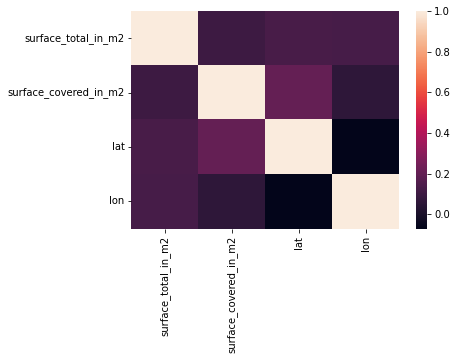

In [ ]:
sns.heatmap(corr, cbar=True)

In [ ]:
df.isnull().sum()

place_name                 0
currency                   0
price_aprox_usd            0
surface_total_in_m2      142
surface_covered_in_m2     35
lat                      188
lon                      188
dtype: int64

In [ ]:
#checking which column between lat and lon have the better correlation with price_aprox_usd
df["lat"].corr(df['price_aprox_usd'])

0.22588069409443406

In [ ]:
df["lon"].corr(df['price_aprox_usd'])

0.09822955043816947

In [ ]:
# we can also wrangle all this into on block of code, if we are going to run the dsame functions ever so often
def wrangle(filepath):
    # Read CSV file
    df = pd.read_csv(filepath)

    # Subset data: Apartments in "Quintana Roo", less than 50,000
    mask_apar = df["property_type"] == "apartment"
    mask_district= df["place_with_parent_names"].str.contains("Quintana Roo")
    mask_price= df["price_aprox_usd"] < 50_000

    df = df[mask_apar & mask_district & mask_price]
    
    # Split "lat-lon" column
    df[["lat", "lon"]] = df["lat-lon"].str.split(",", expand=True).astype(float)
    df.drop(columns="lat-lon", inplace=True)
    
    
    
    # Dropping columns with high number of null values
    df.drop(columns = ["geonames_id", "floor", "rooms", "expenses", "place_name"], inplace = True)
    
    # Dropping low and high cardinal features
    df.drop(columns = ["operation","created_on","property_type", "place_with_parent_names", "properati_url", "description", "title", "image_thumbnail","created_on"], inplace = True)  
    
    # Dropping leaky columns
    df.drop(columns = ["price", "currency", "price_aprox_local_currency", "price_usd_per_m2", "price_per_m2"], inplace = True)
       
    return df


In [ ]:
#df = wrangle("mexico-real-estate.csv")

In [ ]:
#we can see that the lat column has a better correlation with price than lon, so we can could go with lat alone, instead of both.

In [ ]:
df.isnull().sum()

place_name                 0
currency                   0
price_aprox_usd            0
surface_total_in_m2      142
surface_covered_in_m2     35
lat                      188
lon                      188
dtype: int64

In [ ]:
df.drop['currency', axis=1]

SyntaxError: ignored

SyntaxError: ignored

In [ ]:
df.isnull().sum()

place_name                 0
currency                   0
price_aprox_usd            0
surface_total_in_m2      142
surface_covered_in_m2     35
lat                      188
lon                      188
dtype: int64

In [ ]:
#replacing null values
#lets find the mean
df['lat'].mean()

20.912351214206048

In [ ]:
df['lon'].mean()

-87.00782099551544

In [ ]:
df["lat"].replace(np.nan, df["lat"].mean(), inplace=True)
df["lon"].replace(np.nan, df["lon"].mean(), inplace=True)
df["surface_total_in_m2"].replace(np.nan, df["surface_total_in_m2"].mean(), inplace=True)
df["surface_covered_in_m2"].replace(np.nan, df["surface_covered_in_m2"].mean(), inplace=True)

In [ ]:
df.isnull().sum()

place_name               0
currency                 0
price_aprox_usd          0
surface_total_in_m2      0
surface_covered_in_m2    0
lat                      0
lon                      0
dtype: int64

In [ ]:
df.head()

,place_name,currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,lat,lon
1,Nuevo Centro Urbano,USD,2200.00,110.0,110.0,20.626679,-87.075944
2,Nuevo Centro Urbano,ARS,1251.89,110.0,110.0,20.626729,-87.075858
3,Nuevo Centro Urbano,ARS,658.89,65.0,65.0,20.630104,-87.072484
5,Playa del Carmen,ARS,790.67,90.0,90.0,20.630296,-87.072695
6,Playa del Carmen,ARS,560.05,77.0,77.0,20.628296,-87.072637


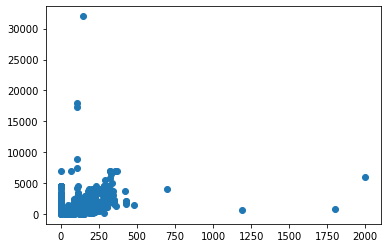

In [ ]:
# Scatter plot
plt.scatter(x= df["surface_covered_in_m2"], y =df["price_aprox_usd"])

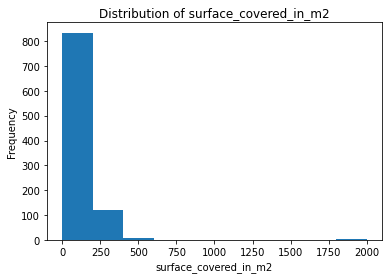

In [ ]:
# Distribution plot
plt.hist(df["surface_covered_in_m2"])
plt.xlabel("surface_covered_in_m2")
plt.ylabel("Frequency")
plt.title("Distribution of surface_covered_in_m2");

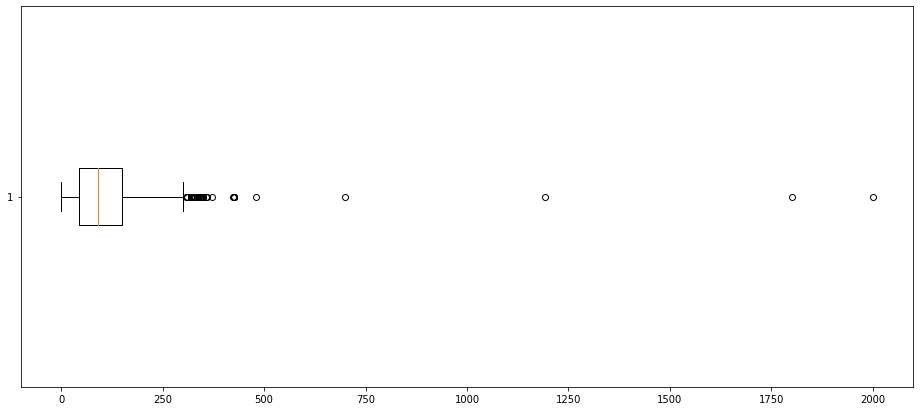

In [ ]:
# Box plots. the fig size is 16,7 so that we can we can see all the outliers
fig, ax = plt.subplots(figsize = (16,7))
plt.boxplot(df["surface_covered_in_m2"], vert=False);

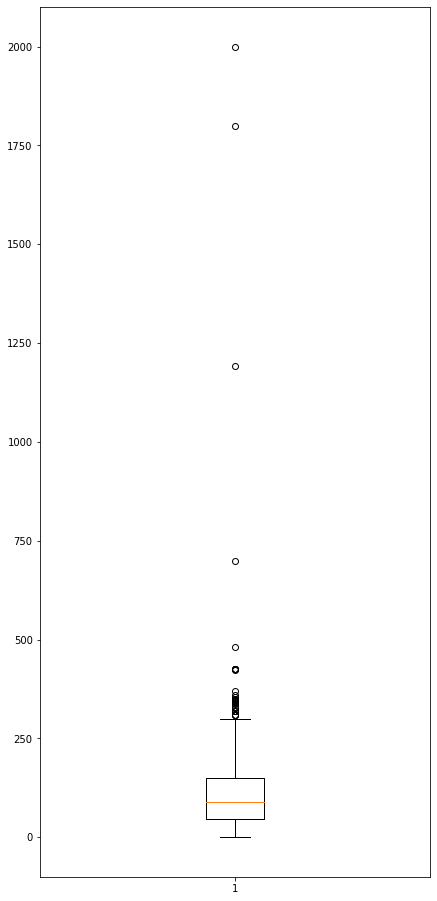

In [ ]:
fig, ax = plt.subplots(figsize = (7,16))
plt.boxplot(df["surface_covered_in_m2"], vert=True);

In [ ]:
# you can see that we have outliers, so we shall go ahead to remove them


In [ ]:
# Remove outliers for "surface_covered_in_m2"
low, high = df["surface_covered_in_m2"].quantile([0.1, 0.9])
mask_area = df["surface_covered_in_m2"].between(low, high)
df[mask_area]

,place_name,currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,lat,lon
1,Nuevo Centro Urbano,USD,2200.00,110.000000,110.0,20.626679,-87.075944
2,Nuevo Centro Urbano,ARS,1251.89,110.000000,110.0,20.626729,-87.075858
3,Nuevo Centro Urbano,ARS,658.89,65.000000,65.0,20.630104,-87.072484
5,Playa del Carmen,ARS,790.67,90.000000,90.0,20.630296,-87.072695
6,Playa del Carmen,ARS,560.05,77.000000,77.0,20.628296,-87.072637
...,...,...,...,...,...,...,...
37478,Playa del Carmen,MXN,500.64,65.000000,65.0,20.654230,-87.087454
37490,Benito Juárez,MXN,342.46,224.119077,66.0,21.112115,-86.884902
37510,Benito Juárez,MXN,737.78,224.119077,120.0,21.116530,-86.891195
37540,Benito Juárez,MXN,1314.83,224.119077,96.0,21.148013,-86.821479


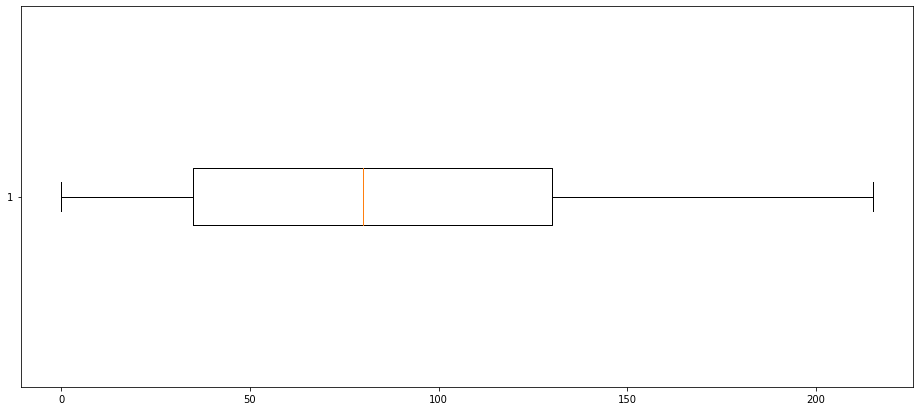

In [ ]:
# Boxplot after removing outliers
fig, ax = plt.subplots(figsize = (16,7))
plt.boxplot(df[mask_area]["surface_covered_in_m2"], vert=False);

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 965 entries, 1 to 37582
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   place_name             965 non-null    object 
 1   currency               965 non-null    object 
 2   price_aprox_usd        965 non-null    float64
 3   surface_total_in_m2    965 non-null    float64
 4   surface_covered_in_m2  965 non-null    float64
 5   lat                    965 non-null    float64
 6   lon                    965 non-null    float64
dtypes: float64(5), object(2)
memory usage: 60.3+ KB


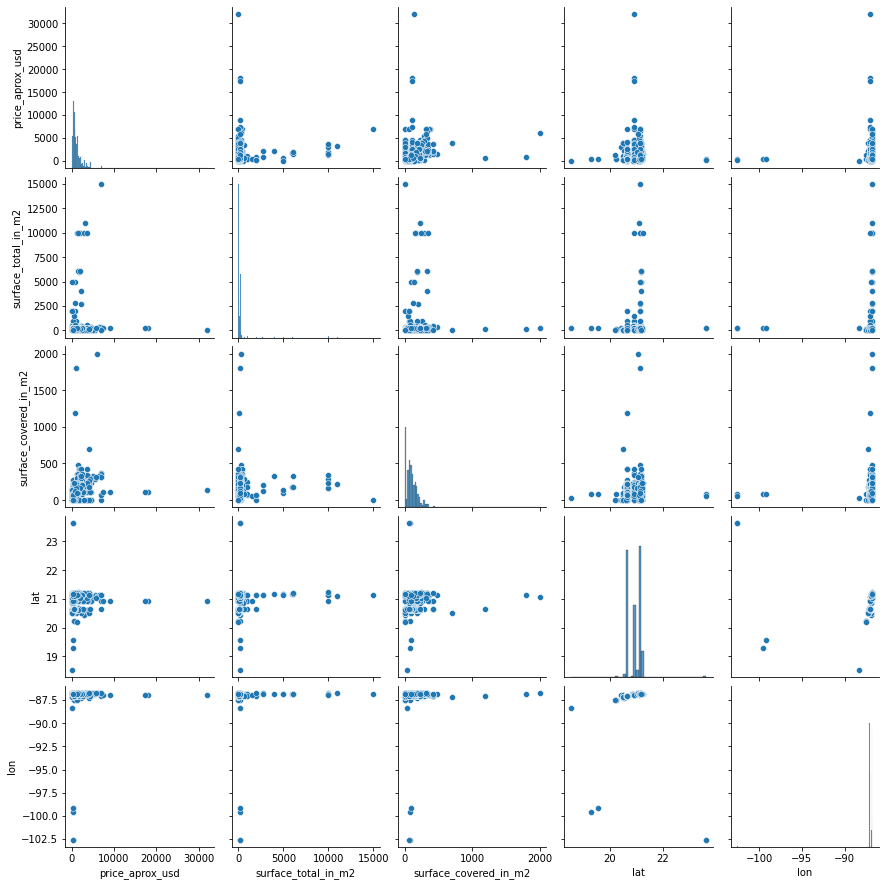

In [ ]:
# Pairplot of the dataframe 
#(running a pairplot runs all the various columns available against themselves. For where the column and the row are the same thing, you'll get a histogram, and a scatter plot for otherwise)
sns.pairplot(df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 965 entries, 1 to 37582
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   place_name             965 non-null    object 
 1   currency               965 non-null    object 
 2   price_aprox_usd        965 non-null    float64
 3   surface_total_in_m2    965 non-null    float64
 4   surface_covered_in_m2  965 non-null    float64
 5   lat                    965 non-null    float64
 6   lon                    965 non-null    float64
dtypes: float64(5), object(2)
memory usage: 60.3+ KB


In [ ]:
# Split Data
target = "price_aprox_usd"
y = df[target]

features = ["surface_covered_in_m2", "lat", "lon", "surface_total_in_m2"]
X =  df[features]

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Building model**

In [ ]:
# Setting model baseline
#MAE is mean absolute error
#MSE is Mean squared error
#RMSE is Root-mean-square error

y_mean = y_train.mean() 
y_pred_baseline = [y_mean]*len(y_train)
print("Mean apt price:",round(y_mean,2))

print("Baseline MAE:", mean_absolute_error(y_train, y_pred_baseline))

Mean apt price: 1316.48
Baseline MAE: 931.4173150957073


In [ ]:
df.head()

,place_name,currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,lat,lon
1,Nuevo Centro Urbano,USD,2200.00,110.0,110.0,20.626679,-87.075944
2,Nuevo Centro Urbano,ARS,1251.89,110.0,110.0,20.626729,-87.075858
3,Nuevo Centro Urbano,ARS,658.89,65.0,65.0,20.630104,-87.072484
5,Playa del Carmen,ARS,790.67,90.0,90.0,20.630296,-87.072695
6,Playa del Carmen,ARS,560.05,77.0,77.0,20.628296,-87.072637


In [ ]:
# Making model pipeline and fitting
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Checking model training absolute error
y_pred_training = model.predict(X_train)
print("Training MAE:", mean_absolute_error(y_train,y_pred_training))

Training MAE: 863.4348388860549


In [ ]:
#you can see that the training MAR is 863 and the Baseline MAe IS 931. The model is fair enough

In [ ]:
y_pred_test = model.predict(X_test)
print("Training MAE:", mean_absolute_error(y_test,y_pred_test))

Training MAE: 784.567335068008


**Commnication of results**

In [ ]:
# print the y-axis intercept
intercept = model.intercept_.round(2)
print(intercept)

-407.19


In [ ]:
coeffients =  model.coef_.round(2)

In [ ]:
# Getting the coefficients of the data
coeff_df = pd.DataFrame(coeffients,X.columns,columns=['Coefficient'])
coeff_df


,Coefficient
surface_covered_in_m2,2.62
lat,428.08
lon,86.59
surface_total_in_m2,0.09


In [ ]:
#we can see that the lat has a higher inmpact on the price and surface area has the least impact on the price

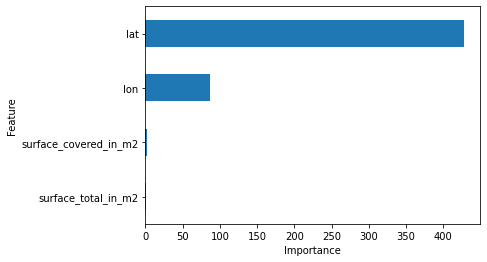

In [ ]:
# showing this graphically....Plotting coefficients of the data
coeff_df["Coefficient"].sort_values(key=abs).plot(kind="barh")
plt.xlabel("Importance")
plt.ylabel("Feature");

In [ ]:
coeff_df = pd.DataFrame(coeffients,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
surface_covered_in_m2,2.62
lat,428.08
lon,86.59
surface_total_in_m2,0.09


In [ ]:
print("Price = {}+{}*surface_covered_in_m2 + {}*lat + {}*lon + {}*surface_total_in_m2"
      .format(intercept,coeff_df["Coefficient"]["surface_covered_in_m2"],coeff_df["Coefficient"]["lat"],coeff_df["Coefficient"]["lon"],coeff_df["Coefficient"]["surface_total_in_m2"]))

Price = -407.19+2.62*surface_covered_in_m2 + 428.08*lat + 86.59*lon + 0.09*surface_total_in_m2


In [ ]:
model.predict([[10,10,10,10]])[0]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


4766.6964999175625